In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Product Analytics

### QuantityDistribution

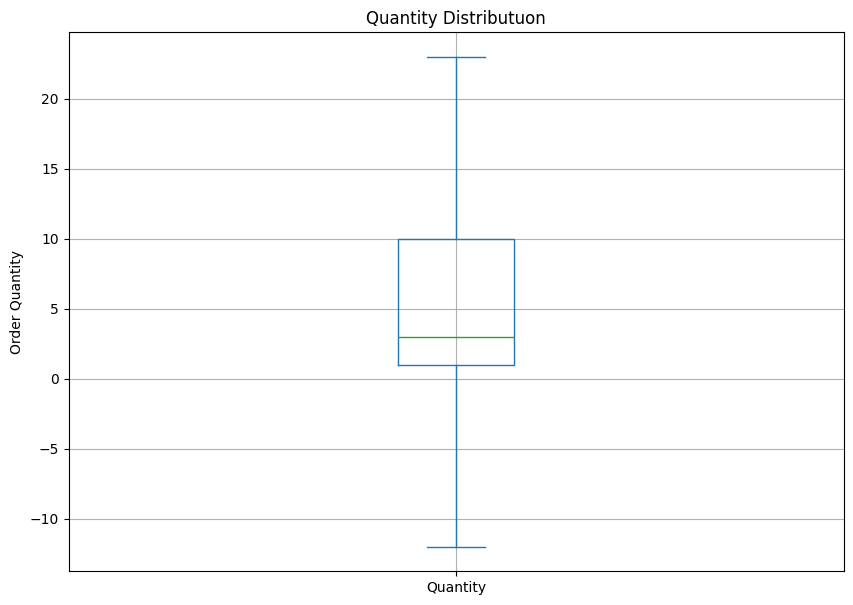

In [5]:
ax = df["Quantity"].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10,7)
)

ax.set_ylabel("Order Quantity")
ax.set_title("Quantity Distributuon")

plt.suptitle("")
plt.show()

In [6]:
pd.DataFrame(df["Quantity"].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


Melihat banyak produk terjual

In [7]:
df.loc[df["Quantity"]>0].shape

(531285, 8)

Time-series Number of Orders

In [8]:
monthly_orders_df = df.set_index("InvoiceDate")["InvoiceNo"].resample('M').nunique()

C:\Users\hisag\AppData\Local\Temp\ipykernel_16848\689239142.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.set_index("InvoiceDate")["InvoiceNo"].resample('M').nunique()


In [9]:
monthly_orders_df

InvoiceDate
2010-12-31    2025
2011-01-31    1476
2011-02-28    1393
2011-03-31    1983
2011-04-30    1744
2011-05-31    2162
2011-06-30    2012
2011-07-31    1927
2011-08-31    1737
2011-09-30    2327
2011-10-31    2637
2011-11-30    3462
2011-12-31    1015
Freq: ME, Name: InvoiceNo, dtype: int64

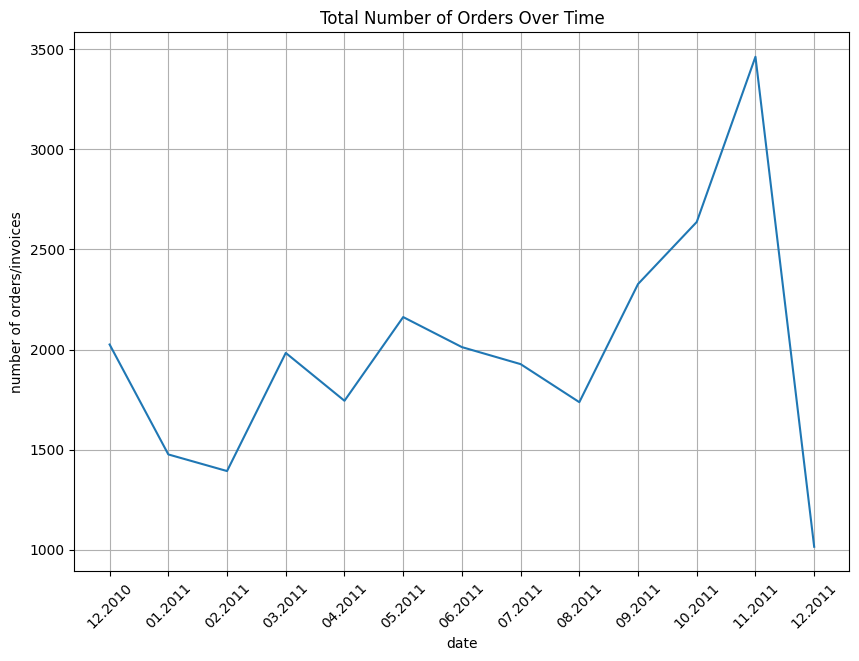

In [10]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel("date")
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

In [11]:
invoice_date = df.loc[
    df["InvoiceDate"] >= '2011-12-01',
    'InvoiceDate'
]

In [12]:
print('Min date: %s\nMax date: %s' % (invoice_date.min(), invoice_date.max()))

Min date: 2011-12-01 08:12:00
Max date: 2011-12-09 12:50:00


In [13]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(516384, 8)

In [14]:
df.shape

(541909, 8)

In [15]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [23]:
monthly_orders_df = df.set_index("InvoiceDate")["InvoiceNo"].resample('M').nunique()
monthly_orders_df

C:\Users\hisag\AppData\Local\Temp\ipykernel_16848\460029574.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.set_index("InvoiceDate")["InvoiceNo"].resample('M').nunique()


InvoiceDate
2010-12-31    2025
2011-01-31    1476
2011-02-28    1393
2011-03-31    1983
2011-04-30    1744
2011-05-31    2162
2011-06-30    2012
2011-07-31    1927
2011-08-31    1737
2011-09-30    2327
2011-10-31    2637
2011-11-30    3462
Freq: ME, Name: InvoiceNo, dtype: int64

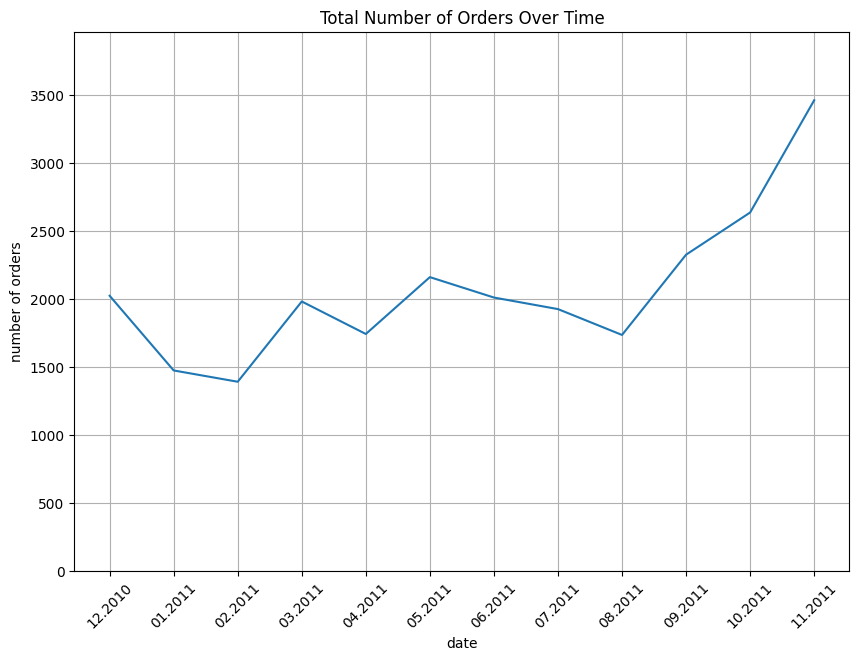

In [24]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel("date")
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0,max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

# Time-series Revenue